<a href="https://colab.research.google.com/github/snowmaricano/Bigdata/blob/main/%5Bpandas_03%5D_fine_dust_LAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.파일 다운로드

In [ ]:
!git clone https://github.com/Soyoung-Yoon/data_01

Cloning into 'data_01'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 47 (delta 15), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (47/47), done.


## 2.Colab에서 한글 폰트 사용하기

In [ ]:
### [230417]변경안내
# colab에서 matplotlib의 버전이 변경되면서
# koreanize_matplotlib 사용이 가능해 졌습니다.
# 아래의 설치 후, import koreanize_matplotlib 를 한 뒤 사용하시면 됩니다.

In [ ]:
!pip install koreanize-matplotlib

In [ ]:
# 사용 예시!
import matplotlib.pyplot as plt
import koreanize_matplotlib
plt.figure(figsize=(4,3))
plt.plot([-1, 0, 1, 2])
plt.xlabel('간단한 그래프')
plt.show()

## 3.미세먼지

In [ ]:
# [3-0] 사용라이브러리 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 3-1.파일 준비하기
- data_day_2016.xlsx, data_day_2017.xlsx, data_day_2018.xlsx, data_day_2019.xlsx 파일을 가져와 df로 합치기작업
- 각 파일에 기록되어 있는 내용
    - 측정일시, 측정소명, 이산화질소농도, 오존농도, 이산화탄소농도, 아황산가스, 미세먼지, 초미세먼지의 측정치

In [ ]:
# [3-1] './data_01/data_day_2016.xlsx' 파일을 가져와 df2016이라는 이름을 부여합니다.


In [ ]:
# [3-2] './data_01/data_day_2017.xlsx' 파일을 가져와 df2017이라는 이름을 부여합니다.


In [ ]:
# [3-3] './data_01/data_day_2018.xlsx' 파일을 가져와 df2018이라는 이름을 부여합니다.


In [ ]:
# [3-4] './data_01/data_day_2019.xlsx' 파일을 가져와 df2019라는 이름을 부여합니다.


In [ ]:
temp1 = pd.DataFrame({'A': [1, 2],
                     'B': [3, 4]})
temp2 = pd.DataFrame({'A': [5, 6],
                     'B': [7, 8]})
pd.concat([temp1, temp2])

,A,B
0,1,3
1,2,4
0,5,7
1,6,8


In [ ]:
temp1 = pd.DataFrame({'A': [1, 2],
                     'B': [3, 4]})
temp2 = pd.DataFrame({'C': [5, 6],
                     'D': [7, 8]})
pd.concat([temp1, temp2], axis=1)

,A,B,C,D
0,1,3,5,7
1,2,4,6,8


In [ ]:
# [3-5] df2016, df2017, df2018, df2019를 합쳐 한 개의 DataFrame으로 만들어 df라는 이름을 지정합니다.
dfList =


# df의 shape을 출력하여 전체 행, 열의 수를 확인합니다.


(60208, 9)

여기서 잠깐! 파일이 많으면요?
- 파일이름 목록을 가져오는 glob 모듈의 glob 함수를 사용함
- 시험 대비용은 아님

In [ ]:
import glob
glob.glob('data_01/data_day_*.xlsx')

['data_01/data_day_2017.xlsx',
 'data_01/data_day_2018.xlsx',
 'data_01/data_day_2019.xlsx',
 'data_01/data_day_2016.xlsx']

In [ ]:
#[TIP] 만일 파일이름을 정렬하고 싶다면 sorted() 함수를 사용합니다.
# (-.- 강의에서는 언급을 몬했어요 ㅎ)
sorted(glob.glob('data_01/data_day_*.xlsx'))

['data_01/data_day_2016.xlsx',
 'data_01/data_day_2017.xlsx',
 'data_01/data_day_2018.xlsx',
 'data_01/data_day_2019.xlsx']

In [ ]:
import glob
dfList = []
for x in sorted(glob.glob('data_01/data_day_*.xlsx')):
    temp = pd.read_excel(x)
    dfList.append(temp)

df = pd.concat(dfList, axis=0)
df.shape

(60208, 9)

In [ ]:
# [3-6] df의 row의 개수 및 각 column의 정보 및 메모리 사용량을 확인합니다.
# 몇몇 컬럼에 대한 정보가 부족한 것을 확인할 수 있습니다.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 60208 entries, 0 to 14268
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   측정일시          60208 non-null  int64  
 1   측정소명          60208 non-null  object 
 2   이산화질소농도(ppm)  58050 non-null  float64
 3   오존농도(ppm)     58075 non-null  float64
 4   이산화탄소농도(ppm)  40421 non-null  float64
 5   아황산가스(ppm)    58075 non-null  float64
 6   미세먼지(㎍/㎥)     59327 non-null  float64
 7   초미세먼지(㎍/㎥)    58429 non-null  float64
 8   일산화탄소농도(ppm)  17591 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.6+ MB


In [ ]:
# [3-7] df의 마지막 3개 행을 출력해 봅니다.
# 데이터가 총 60208인데 마지막 행의 번호가 올바르지 않은 것을 볼 수 있습니다.
# 이것은 concat을 하더라도 index는 유지 되기 때문입니다.


In [ ]:
# [3-8] df2016, df2017, df2018, df2019의 각 shape을 확인합니다.


In [ ]:
[ x.shape for x in dfList]

[(14269, 8), (14235, 8), (12447, 8), (19257, 8)]

In [ ]:
index, columns => 두 가지 방법 사용
1. 눈에 보이지 않는 integer 번호 (python에서의 index번호 개념) => 사용하고 싶음
2. 눈에 보이는 label (다양한 Index타입이 존재)

In [ ]:
# [3-9] 첫 번째 파일 마지막부터 두 번째 파일의 시작 부분의 실제 index를 확인해 봅니다.
# 14268:14271 의 실제 index 확인


,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),이산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),일산화탄소농도(ppm)
14268,20161231,화랑로,0.122,0.004,1.1,0.005,64.0,NaN,NaN
0,20170101,강남구,0.040,0.002,0.8,0.005,80.0,58.0,NaN
1,20170101,강남대로,0.082,0.005,1.4,0.007,83.0,58.0,NaN


여러개 DataFrame을 합친 경우 index 번호를 RangeIndex로 새롭게 부여
- pd.concat([df1, df2...], ignore_index=True)
- DataFrame.index = pd.RangeIndex(len(df))

In [ ]:
# [3-10] 해결방법 1 : index 번호 정리하면서 합치기
dfList = [df2016, df2017, df2018, df2019]
df2 =


,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),이산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),일산화탄소농도(ppm)
60205,20190818,행주,0.014,0.060,NaN,0.004,25.0,13.0,0.5
60206,20190818,홍릉로,0.027,0.047,NaN,0.004,30.0,20.0,0.7
60207,20190818,화랑로,0.022,0.040,NaN,0.003,13.0,13.0,0.3


In [ ]:
# [3-11] 해결방법 2 : index를 만들어 사용하기
df.index =


,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),이산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),일산화탄소농도(ppm)
60205,20190818,행주,0.014,0.060,NaN,0.004,25.0,13.0,0.5
60206,20190818,홍릉로,0.027,0.047,NaN,0.004,30.0,20.0,0.7
60207,20190818,화랑로,0.022,0.040,NaN,0.003,13.0,13.0,0.3


### 3-2.날짜 타입변경

In [ ]:
# [3-12] df의 컬럼별 데이터 타입을 확인합니다.


In [ ]:
# [3-13] df의 '측정일시'에 대해서 astype을 사용해 데이터 타입을 datetime으로 변경합니다.
# 올바르게 변경되지 않는 것을 확인할 수 있습니다.


날짜, 시간 타입 변경 (youtube 분석에서 했었어요!)
- pd.to_datetime(Series, format='형식')
    - %Y: 4글자 년도, %y : 2글자 년도, %m : 2글자 월, %d : 2글자 일
    - 다양한 형식 문자들 : https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
    - format의 지정이 필수는 아님

In [ ]:
# [3-14] df의 '측정일시'에 대해서 format='%Y%m%d'을 지정하여 데이터 타입을 datetime으로 변경합니다.
# 올바르게 변경되는 것을 확인할 수 있습니다.


DataFrame.insert(위치, 이름, 데이터)
- return이 없는 함수 (inplace 동작)
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.insert.html

In [ ]:
# [3-15] df의 '측정일시'에 대해서 format='%Y%m%d'을 지정하여 데이터 타입을 datetime으로 변경한 뒤
# '측정일시2' 컬럼을 '측정일시' 뒤에 삽입합니다
#df['측정일시2'] = pd.to_datetime(df['측정일시'], format='%Y%m%d')   # 뒤에 추가


In [ ]:
# [3-16] df에 datetime64 데이터타입을 갖는 '측정일시2' 컬럼이 추가된 것을 확인합니다.


In [ ]:
# [3-17] datetime 타입은 accessor - dt를 사용할 수 있습니다.
# https://pandas.pydata.org/pandas-docs/stable/reference/series.html#accessors
# df의 '측정일시2' 컬럼의 dt accessor를 사용하여 year 정보만 확인합니다.


In [ ]:
# [3-18] df의 '측정일시2' 컬럼의 dt를 사용하여 month 정보만 확인합니다.


In [ ]:
# [3-19] df의 '측정일시2' 컬럼의 dt를 사용하여 day 정보만 확인합니다.


In [ ]:
# [3-20] df에 '년', '월', '일' 컬럼을 추가합니다.



df.head(2)

DataFrame.drop([컬럼이름1, 컬럼이름2,...], axis=1)
- 컬럼 삭제
- 목록에 있는 컬럼이 삭제된 DataFrame을 반환

DataFrame.drop([행이름1, 행이름2, ...], axis=0)
- 행 삭제
- 목록에 있는 행이 삭제된 DataFrame을 반환

삭제할 컬럼 또는 행이 1개인 경우 목록이 아닌 한 개 이름만 지정할 수 있음

In [ ]:
# [3-21] '측정일시2' 컬럼이 필요 없으므로 제거합니다.
# 컬럼을 제거하기 위해서는 drop 함수에서 axis=1 을 사용해야 합니다.
# 삭제된 DataFrame을 df2 이름을 지정합니다.
#df.drop('측정일시2', axis=1)
df2 =


,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),이산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),일산화탄소농도(ppm),년,월,일
0,20160101,강남구,0.047,0.006,0.8,0.006,73.0,44.0,NaN,2016,1,1
1,20160101,강남대로,0.054,0.004,1.2,0.009,85.0,52.0,NaN,2016,1,1


In [ ]:
df2.to_csv('fine_dust.csv', index=False)

In [ ]:
df2 = pd.read_csv('fine_dust.csv')
df2.head(2)

### 3-3.결측치 확인
- [pandas-02] drinks 에서 다루어 본 내용입니다.
- heatmap 그래프를 사용한 결측치 확인방법을 알아보겠습니다.
- 데이터가 많을 때 직관적인 판단을 할 수 있게 됩니다.


In [ ]:
# 데이타가 많은 경우 모두 출력 안되고 ... 으로 생략해서 출력됩니다.
# 생략되지 않는 행, 열의 개수를 설정하여 생략되지 않고 출력되도록 합니다.
pd.set_option('max_rows', 800)    #출력할 max row를 지정
pd.set_option('max_columns', 100)  #출력할 max columns를 지정

In [ ]:
# [3-22] df2를 복사하여 df를 생성합니다.
# 앞으로 결측치에 대한 처리는 df를 사용합니다.


In [ ]:
# [3-23] df의 행별 결측치를 조사합니다.


In [ ]:
# [3-24] '측정일시'를 index로 설정하고,
# index 기준으로 오름차순 정렬해서 df1으로 이름 붙입니다.
# 그래프에서 y축으로 사용하려고 합니다.
df1 =

In [ ]:
https://seaborn.pydata.org/generated/seaborn.heatmap.html
# vmax, vmin, cbar

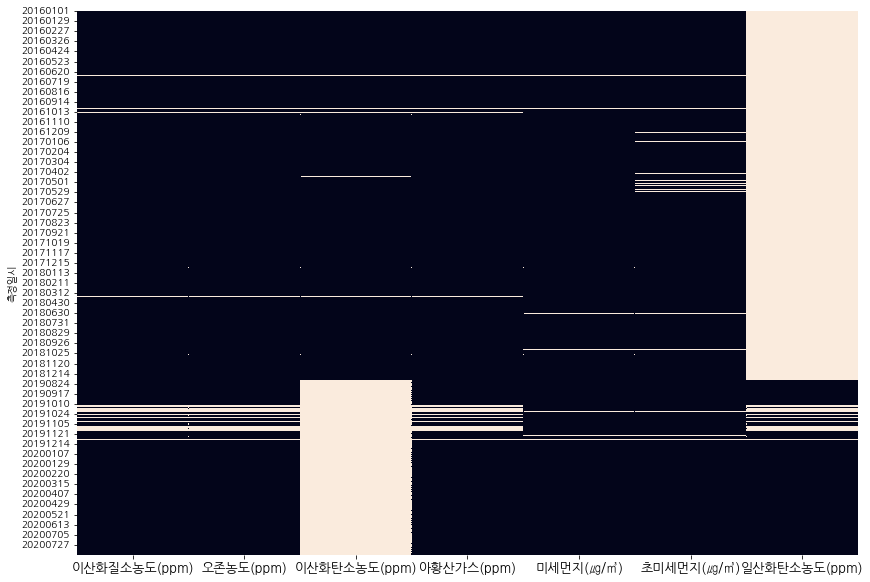

In [ ]:
# [3-25] df1의 '이산화질소농도(ppm)':'일산화탄소농도(ppm)'의 결측치의 상태를 그래프로 확인해 봅니다
# seaborn.heatmap()를 사용하며, df.isna()를 데이터로 지정해 확인할 수 있습니다.
# 흐린색이 결측치를 의미합니다.
import koreanize_matplotlib

plt.figure(figsize=(14, 10))
ax = sns.heatmap(df1.loc[:, '이산화질소농도(ppm)':'일산화탄소농도(ppm)'].isna(), cbar=False)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=13, rotation=0)
plt.show()

데이터 중에서 오존농도, 미세먼지, 초미세먼지에 대해서만 사용할 것이므로, indexing한 뒤 다시 결측치 정보를 확인합니다.

In [ ]:
df['컬럼명'] : 1개의 컬럼을 Series로 반환
df[['컬럼명1', '컬럼명2', ...]]  : 여러개의 컬럼을 DataFrame으로 반환
df['행이름1':'행이름N'] : 행이름1 ~ 행이름 N 전까지를 반환
df[조건] : 행 중에서 조건이 True인 행을 반환

In [ ]:
# [3-26] df1에서 '측정소명', '년', '월', '일','오존농도(ppm)', '미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)'컬럼만
# 추출하여 df_dust 라는 이름을 정의합니다.
df_dust =


,측정소명,년,월,일,오존농도(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
측정일시,,,,,,,
20160101,강남구,2016,1,1,0.006,73.0,44.0
20160101,성북구,2016,1,1,0.005,71.0,45.0


In [ ]:
# [3-27] df_dust의 컬럼별 결측치 개수를 구해봅니다


측정소명             0
년                0
월                0
일                0
오존농도(ppm)     2133
미세먼지(㎍/㎥)      881
초미세먼지(㎍/㎥)    1779
dtype: int64

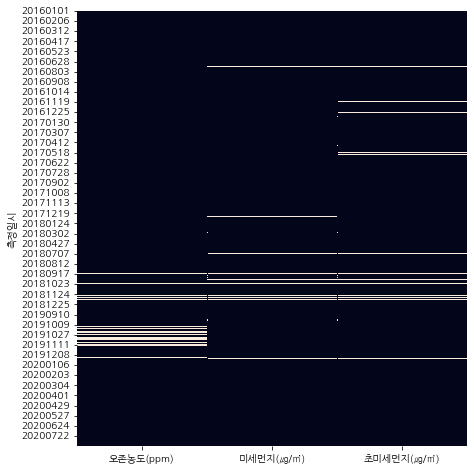

In [ ]:
# [3-28] df_dust의 '오존농도(ppm)':'초미세먼지(㎍/㎥)'에 대한 결측치 heatmap을 그려봅니다.
plt.figure(figsize=(7, 8))
sns.heatmap(df_dust.loc[:, '오존농도(ppm)':'초미세먼지(㎍/㎥)'].isna(), cbar=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0,fontsize=12)
plt.show()

- DataFrame의 index를 columns로 사용 : DataFrame.reset_index()
- DataFrame의 columns를 index로 사용 : DataFrame.set_index('컬럼이름')


In [ ]:
# [3-29] df_dust의 index를 다시 컬럼으로 사용되도록 합니다.
# 다음 작업인 결측치 삭제를 사용하기 위함
df_dust =


,측정일시,측정소명,년,월,일,오존농도(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,20160101,강남구,2016,1,1,0.006,73.0,44.0
1,20160101,성북구,2016,1,1,0.005,71.0,45.0


### 3-4.결측치 제거

DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
- 결측치 제거에 사용되는 메서드
- how='any' : 결측치가 하나라도 포함된 행 삭제
- how='all' : 모든 데이터가 결측치인 행 삭제
- axis=1 : 컬럼에 대해 동작
- thresh=숫자 : 숫자 이상의 데이터를 가진 행은 삭제 안함
- subset=[컬럼이름1, ...] : subset으로 지정된 컬럼만 사용하여 삭제 대상 검색

In [ ]:
# [3-30] df_dust 에서 ['오존농도(ppm)','미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)']에서
# 모든 데이터가 결측치인 행을 제거하여 결과를 temp1으로 저장합니다


# df_dust와 temp1의 행의 수 (len)을 확인하여 제거된 행의 개수를 확인합니다.


In [ ]:
# [3-31] df_dust 에서 ['오존농도(ppm)','미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)']에서
# 하나라도 결측치가 있는 행을 제거하여 결과를 temp2로 저장합니다.


# df_dust와 temp2의 행의 수 (len)을 확인하여 제거된 행의 개수를 확인합니다.


In [ ]:
# [3-32] df_dust 에서 ['오존농도(ppm)','미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)']에서
# 2개 이상의 데이터를 가진 행은 제거하지 않은 결과를 temp3로 저장합니다.
# (= 3개의 정보 중 1개의 데이터만 가진 행을 제거함)


# df_dust와 temp3의 행의 수 (len)을 확인하여 제거된 행의 개수를 확인합니다.


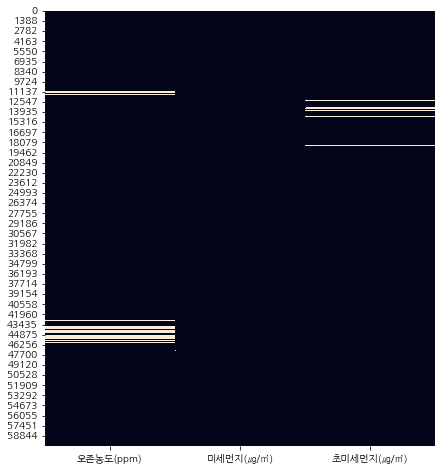

In [ ]:
# [3-33] temp1, temp2, temp3의 '오존농도(ppm)':'초미세먼지(㎍/㎥)'에 대한 결측치 heatmap을 그려봅니다.
# temp1, temp3는 부분적으로 결측치가 남아있고, temp2는 결측치가 없습니다.
plt.figure(figsize=(7, 8))
sns.heatmap(temp3.loc[:, '오존농도(ppm)':'초미세먼지(㎍/㎥)'].isna(), cbar=False)
plt.show()

df.groupby(by=[컬럼1, 컬럼2, ...]).함수()
- 그룹 기준으로 목록을 지정하면 MultiIndex로 만들어짐
- MultiIndex인 경우의 indexing은 tuple을 사용함
- ['년', '월']을 그룹 기준으로 사용한 경우 (2017, 6) 처럼 지정함

In [ ]:
# [3-34] df_dust에서 '년', '월'별 '미세먼지(㎍/㎥)' 데이터의 평균을 구해
# DataFrame으로 만들어 meandf 라는 이름을 지정합니다.ㅣ
meandf =


In [ ]:
# [3-35] meandf에서 2017년 6월까지의 데이터만 출력합니다.


In [ ]:
# [3-36] meandf에 '결측치제거후' 및 '차이'라는 컬럼을 추가합니다.
# '결측치제거후' 컬럼은 temp2에서 '년', '월'별 '미세먼지(㎍/㎥)' 데이터의 평균을 사용합니다.
# '차이' 컬럼은 '미세먼지(㎍/㎥)' - '결측치제거후' 를 사용합니다.


In [ ]:
# [3-37] meandf에서 2017년 6월까지의 데이터만 출력합니다.
# 여러 개의 값에 차이가 있는 것을 확인 할 수 있습니다.


In [ ]:
temp2의 경우 NaN 데이터를 포함한 행 삭제시 평균 값이 달라진 것을 확인 할 수 있습니다.
삭제된 행 중, 미세먼지에 대한 값을 가진 것이 있기 때문입니다.
"결측치 제거시에는 주의가 필요합니다."

### 3-5.결측치 대체 (평균값)

Series.mask(조건, 조건이 참일 때 사용할 값 또는 값 목록)
- 조건이 True인 것에 대해 다른 값을 변경합니다.
- s.isna() : NA값에 대해 True, NA아닌 것은 False

Series.where(조건, 조건이 거짓일 때 사용할 값 또는 값 목록)
- 조건이 False인 것에 대해서 다른 값으로 변경합니다.
- s.notna() : NA값에 대해 False, NA아닌 것은 True

In [ ]:
# [3-38] where 연습을 위한 temp 생성
import numpy as np
temp = pd.DataFrame({'A':[np.nan, 2, np.nan, 4],
                     'B':[7, 8, 9, 10],
                     'C':[1, 2, 4, 8]})
temp

In [ ]:
# temp의 'A' 열에 대해서 결측치인 경우 'B'의 값으로 대체합니다.


In [ ]:
# temp의 'A' 열에 대해서 결측치인 경우 'C'의 값으로 대체합니다.


df.groupby(그룹기준컬럼)[함수를 적용할 컬럼명].transform(함수)
- index가 유지 되면서 그룹별 함수를 적용함
- agg는 index가 그룹기준컬럼으로 변경됨

In [ ]:
# [앗! 살펴 보세요 ^^]
df_dust.groupby(['측정일시'])['미세먼지(㎍/㎥)'].mean()  # <- 동일한 값을 갖음.  MultiIndex 아님

측정일시
20160101    70.736842
20160102    53.789474
20160103    98.861111
20160104    76.205128
20160105    34.333333
              ...    
20200814    31.660000
20200815    37.400000
20200816    22.380000
20200817    24.980000
20200818    27.080000
Name: 미세먼지(㎍/㎥), Length: 1403, dtype: float64

In [ ]:
# [3-39] df_dust의 일자(년, 월, 일)별 '미세먼지(㎍/㎥)'의 평균을 구합니다.
# 이때, index 변경을 하지 않기 위해 transform을 사용하고, fine_dust라는 이름을 지정합니다.


In [ ]:
# [3-40] df_dust['미세먼지(㎍/㎥)'], fine_dust의 결측치 값의 개수를 구합니다.


In [ ]:
# [3-41] df_dust의 '미세먼지(㎍/㎥)'의 결측치를 fine_dust의 값으로 채우기 합니다.
# 채우기 한 결과를 다시 df_dust['미세먼지(㎍/㎥)']로 저장합니다.


In [ ]:
# [3-42] df_dust의 컬럼별 결측치 개수를 확인하여 봅니다.
# 미세먼지에 대한 결측치가 제거 되었습니다.


In [ ]:
# [3-43] meandf에 '결측치대체' 및 '차이2'라는 컬럼을 추가합니다.
# '결측치대체' 컬럼은 df_dust에서 '년', '월'별 '미세먼지(㎍/㎥)' 데이터의 평균을 사용합니다.
# '차이2' 컬럼은 '미세먼지(㎍/㎥)' - '결측치대체'를 사용합니다.


In [ ]:
# [3-44] meandf에서 2017년 6월까지의 데이터만 출력합니다.
# 차이가 없는 것을 확인합니다.


In [ ]:
# [3-45] df_dust의 '오존농도(ppm)', '초미세먼지(㎍/㎥)' 컬럼에 대해서도
# '미세먼지(㎍/㎥)'와 같이 동일한 '년', '월', '일'의 평균 값으로 채우기 합니다.


In [ ]:
# [3-46] df_dust의 컬럼별 결측치 개수를 확인합니다.


In [ ]:
# 필요시 저장하였다가 가져와 사용하면 됩니다 ^^!
df_dust.to_csv('fine_dust02.csv', index=False)

In [ ]:
df_dust2 = pd.read_csv('fine_dust02.csv')
df_dust2.isna().sum()

In [ ]:
import shelve
with shelve.open('mydata') as data:
    data['fine_dust02'] = df_dust

In [ ]:
import shelve
with shelve.open('mydata') as data:
    df_dust3 = data['fine_dust02']

### 3-6. 미세먼지 분석

In [ ]:
# 데이터 값 실수. 소수점 넷째자리까지 표시
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
# [3-47] df_dust의 첫 2개 행을 출력합니다.


,측정일시,측정소명,년,월,일,오존농도(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,20160101,강남구,2016,1,1,0.006,73.0,44.0
1,20160101,성북구,2016,1,1,0.005,71.0,45.0


행, 열에 모두 group을 지정하여 통계값 구하기
- DataFrame.pivot_table(index=행방향그룹열이름, columns=열방향그룹열이름, values=집계대상열이름, aggfunc=구할 통계값)
- 각각에 대해 단독 또는 목록을 사용할 수 있음
- index, columns는 범주형, values는 연속형 사용
- values, aggfunc의 경우 단독의 경우 출력에 표시되지 않으나, 목록은 표시됨

In [ ]:
# [3-48] df_dust의 월/년 별 미세먼지의 'mean', 'min', 'max' 구하기
# pivot_table 사용, values의 경우 목록으로 지정시와 단독 지정시가 다르게 표시됨


In [ ]:
# [3-49] df_dust에서 '측정소명'이 '강남구'인 데이터의
# 월별(index), 년별(columns), 미세먼지 농도 평균을 조회하여 temp로 저장합니다


- Series.argmax() : 가장 값이 큰 것의 integer index 구하기
- Series.argmin() : 가장 값이 작은 것의 integer index 구하기
- Series[Series.argmax()] : 가장 큰 값 구하기
- Series[Series.argmin()] : 가장 작은 값 구하기

In [ ]:
# argmin, argmax를 연습하기 위한 Series
s = pd.Series([1, 0, 5, 7, 9, 2, 6, 8],
              index=list('ABCDEFGH'))
s

A    1
B    0
C    5
D    7
E    9
F    2
G    6
H    8
dtype: int64

In [ ]:
# argmin(), argmax() 구하기
a = s.argmin()
b = s.argmax()
print(a, s[a])
print(b, s[b])

1 0
4 9


In [ ]:
# [3-50] 2016년 ~ 2020년도 미세먼지 농도가 가장 높은 월의 위치


In [ ]:
# 2019년 데이터 중 1~7월이 없기 때문에 12월이 나옴

In [ ]:
# [3-51] 2016년 ~ 2020년도 미세먼지 농도가 가장 낮은 월의 위치


In [ ]:
# 2020년 데이터 중 9-12월이 없기 때문에 7월이 나옴

In [ ]:
# [3-52] 2016년 ~ 2019년 월별 미세먼지 평균을 구해 temp (DataFrame)로 저장합니다.


In [ ]:
# [3-53] 2020년 월별 미세먼지 평균을 구해 temp에 '미세먼지 2020' 컬럼으로 추가합니다.


In [ ]:
# [3-54] temp에 '차이'라는 이름의 컬럼을 추가합니다.
# '차이' = '미세먼지(㎍/㎥)' - '미세먼지 2020'


### 3-7. 그래프로 확인하기

In [ ]:
## 그래프만 하시는 분들은
# 1. 파일다운로드
# 2. Colab에서 한글 폰트 사용하기 실행 후 진행하세요

In [ ]:
# 데이터 작성 - 그래프만 작성해볼때 사용하시면 됩니다.
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

# 데이터 값 실수. 소수점 둘째자리까지 표시
pd.options.display.float_format = '{:.2f}'.format

dfList = []
for x in sorted(glob.glob('data_01/data_day_*.xlsx')):
    temp = pd.read_excel(x)
    dfList.append(temp)

df = pd.concat(dfList, axis=0, ignore_index=True)
#df.shape
df.insert(1, '측정일시2', pd.to_datetime(df['측정일시'], format='%Y%m%d'))
df['년'] = df['측정일시2'].dt.year
df['월'] = df['측정일시2'].dt.month
df['일'] = df['측정일시2'].dt.day
df2 = df.drop(columns=['측정일시2'])
df1 = df.set_index('측정일시').sort_index()
df_dust = df1[['측정소명', '년', '월', '일','오존농도(ppm)', '미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)']]
df_dust = df_dust.reset_index()
fine_dust = df_dust.groupby('측정일시')['미세먼지(㎍/㎥)'].transform('mean')
s = df_dust['미세먼지(㎍/㎥)']
df_dust['미세먼지(㎍/㎥)'] = s.mask(s.isna(), fine_dust)
x = df_dust.groupby('측정일시')[['오존농도(ppm)', '초미세먼지(㎍/㎥)']].transform('mean')
y = df_dust[['오존농도(ppm)', '초미세먼지(㎍/㎥)']]
df_dust[['오존농도(ppm)', '초미세먼지(㎍/㎥)']] = y.mask(y.isna(), x)

In [ ]:
# [3-55] 월별(index), 년별(columns), 미세먼지 농도 평균을 조회하여 data로 저장합니다


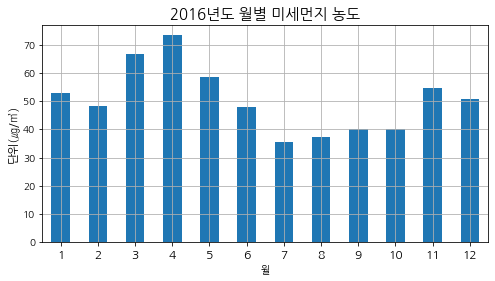

In [ ]:
# [3-56] 2016년도 미세먼지 농도가 가장 높은 월은?
year = 2016


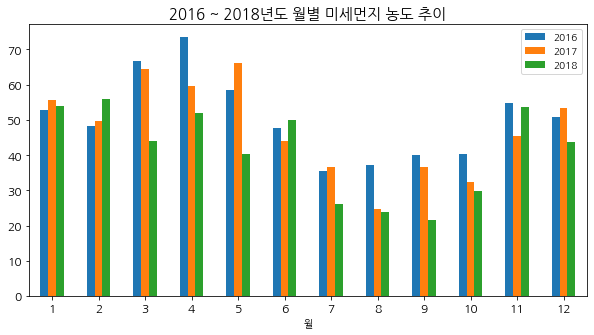

In [ ]:
# [3-57] 2016 ~ 2018 년도별 월별 미세먼지 농도 추이 그래프


In [ ]:
# [3-58] 2016~2018년까지의 월별 미세먼지 평균 구하기



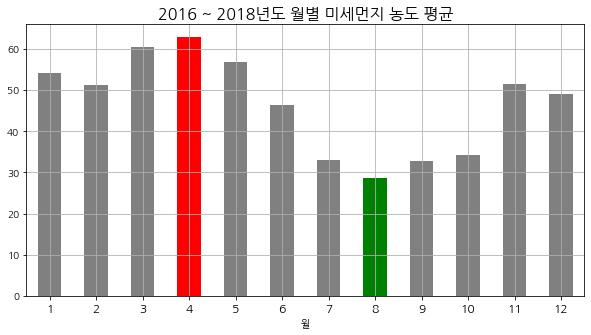

In [ ]:
# [3-59] 3년 평균 미세먼지 농도가 가장 높은 월과 낮은 월 강조 그래프




In [ ]:
# [3-60] 2016~2018 미세먼지 농도 측정치 중 가장 큰 값은?


270.0

In [ ]:
# [3-61] 2016~2018 미세먼지 농도 측정치 중 가장 큰 값을 갖는 정보


,측정일시,측정소명,년,월,일,오존농도(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
4405,20160423,신촌로,2016,4,23,0.01,270.00,46.00


In [ ]:
# [3-62] 측정소 중에서 평균 미세먼지 농도가 가장 낮은 곳은 어디일까?


측정소명
도로변1(광화문역)   22.19
Name: 미세먼지(㎍/㎥), dtype: float64

In [ ]:
# [3-63] 측정소 중에서 평균 미세먼지 농도가 가장 높은 곳은 어디일까?



미세먼지(㎍/㎥)   96.52
Name: 공사장2(신문로), dtype: float64


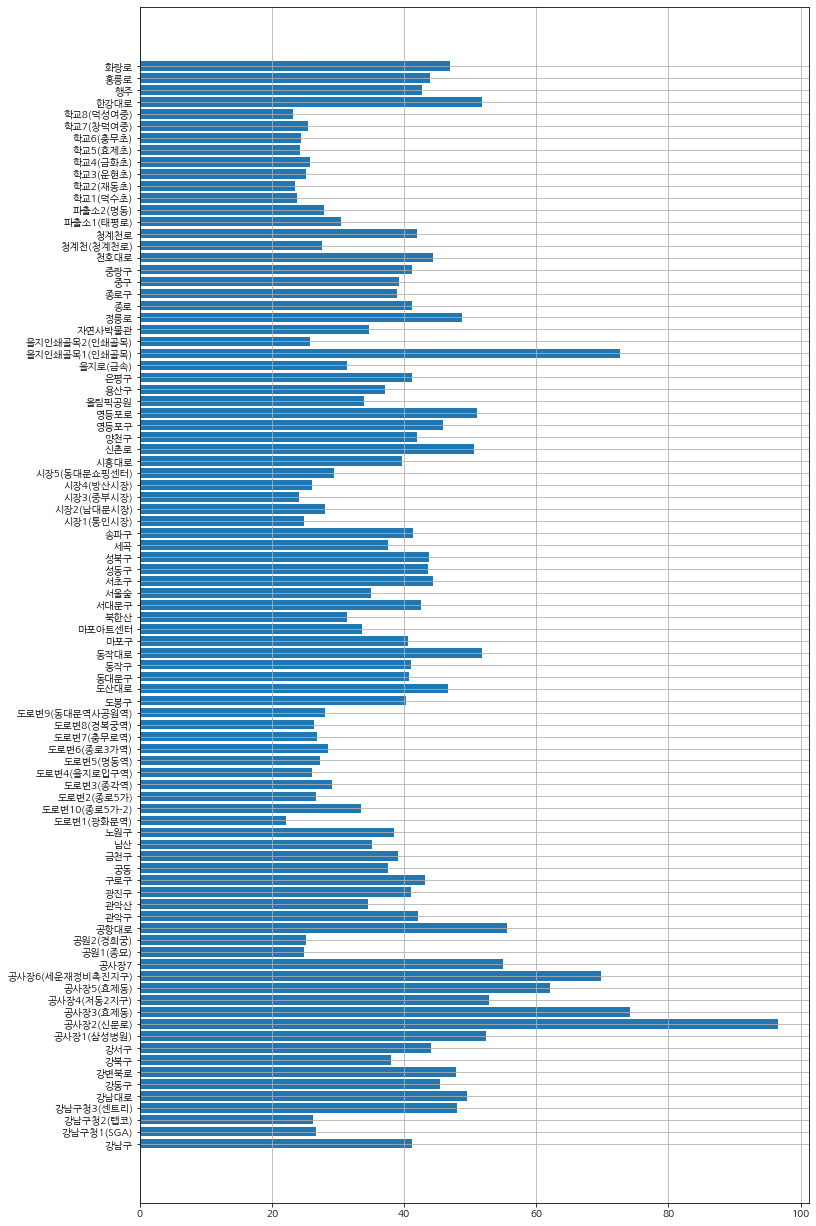

In [ ]:
# [3-64] 측정소별 미세먼지 농도 평균을 그래프로 살펴보자

